In [68]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path

import requests
import numpy as np

import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from pandas_profiling import ProfileReport

In [14]:
#Loading data from kaggle on Insurance Premiums
IP_data=pd.read_csv(r'C:\Users\divin\OneDrive\Desktop\Data Science\Capstone 1\Medicalpremium.csv')

In [15]:
#Insurance Premium data info
IP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [16]:
#Insurance Premium data frame header
IP_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [17]:
#checking for null values in IP_data
IP_data.isnull().sum()
IP_data.isnull().mean()

Age                        0.0
Diabetes                   0.0
BloodPressureProblems      0.0
AnyTransplants             0.0
AnyChronicDiseases         0.0
Height                     0.0
Weight                     0.0
KnownAllergies             0.0
HistoryOfCancerInFamily    0.0
NumberOfMajorSurgeries     0.0
PremiumPrice               0.0
dtype: float64

In [18]:
#Insurance Premium data means
IP_data.mean()

Age                           41.745436
Diabetes                       0.419878
BloodPressureProblems          0.468560
AnyTransplants                 0.055781
AnyChronicDiseases             0.180527
Height                       168.182556
Weight                        76.950304
KnownAllergies                 0.215010
HistoryOfCancerInFamily        0.117647
NumberOfMajorSurgeries         0.667343
PremiumPrice               24336.713996
dtype: float64

In [19]:
#Insurance Premium Price value data
IP_data.PremiumPrice.value_counts()


23000    249
15000    202
28000    132
25000    103
29000     72
30000     47
35000     41
38000     34
31000     31
21000     26
19000     15
26000      7
39000      5
24000      4
32000      4
16000      3
18000      2
34000      2
36000      2
22000      1
40000      1
20000      1
27000      1
17000      1
Name: PremiumPrice, dtype: int64

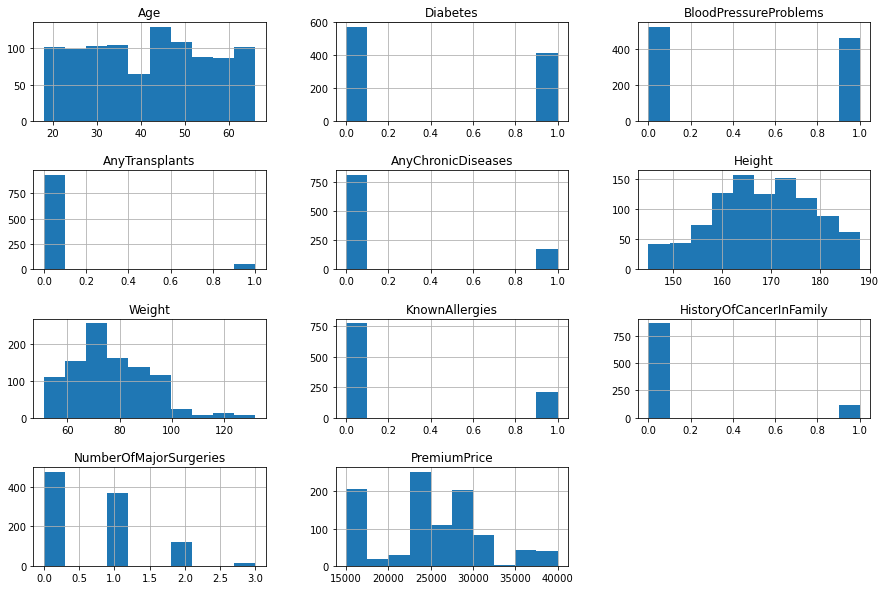

In [20]:
IP_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace = 0.5);

In [21]:
#Calculating BMI and adding it to dataframe
BMI = ((IP_data.Weight/(IP_data.Height**2))*10000)
IP_data["BMI"] = BMI
print (IP_data)
#Healthy_BMI= BMI=< 24.9
#Overweight_BMI= 24.9>BMI=<29.9
#Obese_BMI = BMI>29.9


     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [22]:
columns= ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice', 'BMI']
subset=IP_data[columns]
subset.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540,-0.042027
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209,-0.022913
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097,-0.038028
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056,0.023508
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610,-0.056980
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910,-0.504947
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507,0.820679
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103,0.040437
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139,0.002390
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250,-0.027225


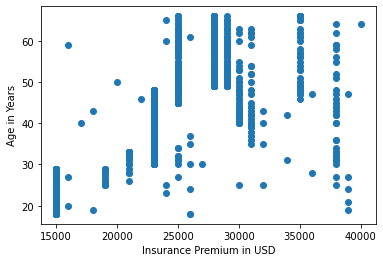

In [23]:
Age= IP_data["Age"]
Premium = IP_data["PremiumPrice"]
plt.plot(Premium, Age, 'o')
plt.ylabel('Age in Years')
plt.xlabel('Insurance Premium in USD')
plt.show()

In [36]:
IP_data.query ('Age == 19')


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
67,19,0,0,0,0,148,60,0,1,1,15000,27.392257
129,19,1,0,0,0,185,62,0,0,1,15000,18.115413
161,19,0,0,0,0,165,78,1,1,1,15000,28.650138
186,19,0,0,0,0,173,129,1,0,0,15000,43.102008
195,19,0,0,0,0,164,132,0,0,0,15000,49.077930
249,19,0,0,0,0,169,87,0,0,0,15000,30.461118
336,19,0,0,0,0,166,70,1,0,0,15000,25.402816
353,19,0,0,0,0,172,97,0,0,1,15000,32.787994
382,19,0,0,0,0,164,97,0,0,0,15000,36.064842
444,19,0,0,0,0,158,73,0,0,0,18000,29.242109


In [37]:
IP_data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996,27.460709
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382,5.878671
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,15.156281
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000,23.393392
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000,27.156602
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000,30.759870
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000,50.000000


In [72]:
#IP_profile = IP_data[np.random.rand(100, 5), columns==("Age", "PremiumPrice", "BMI", "Diabetes", "HighBloodPressure")]
#profile = ProfileReport[IP_profile, title=="Pandas Profiling Report"]
IP_data.PremiumPrice.sort_values()

492    15000
510    15000
480    15000
476    15000
468    15000
       ...  
984    39000
976    39000
204    39000
926    39000
295    40000
Name: PremiumPrice, Length: 986, dtype: int64

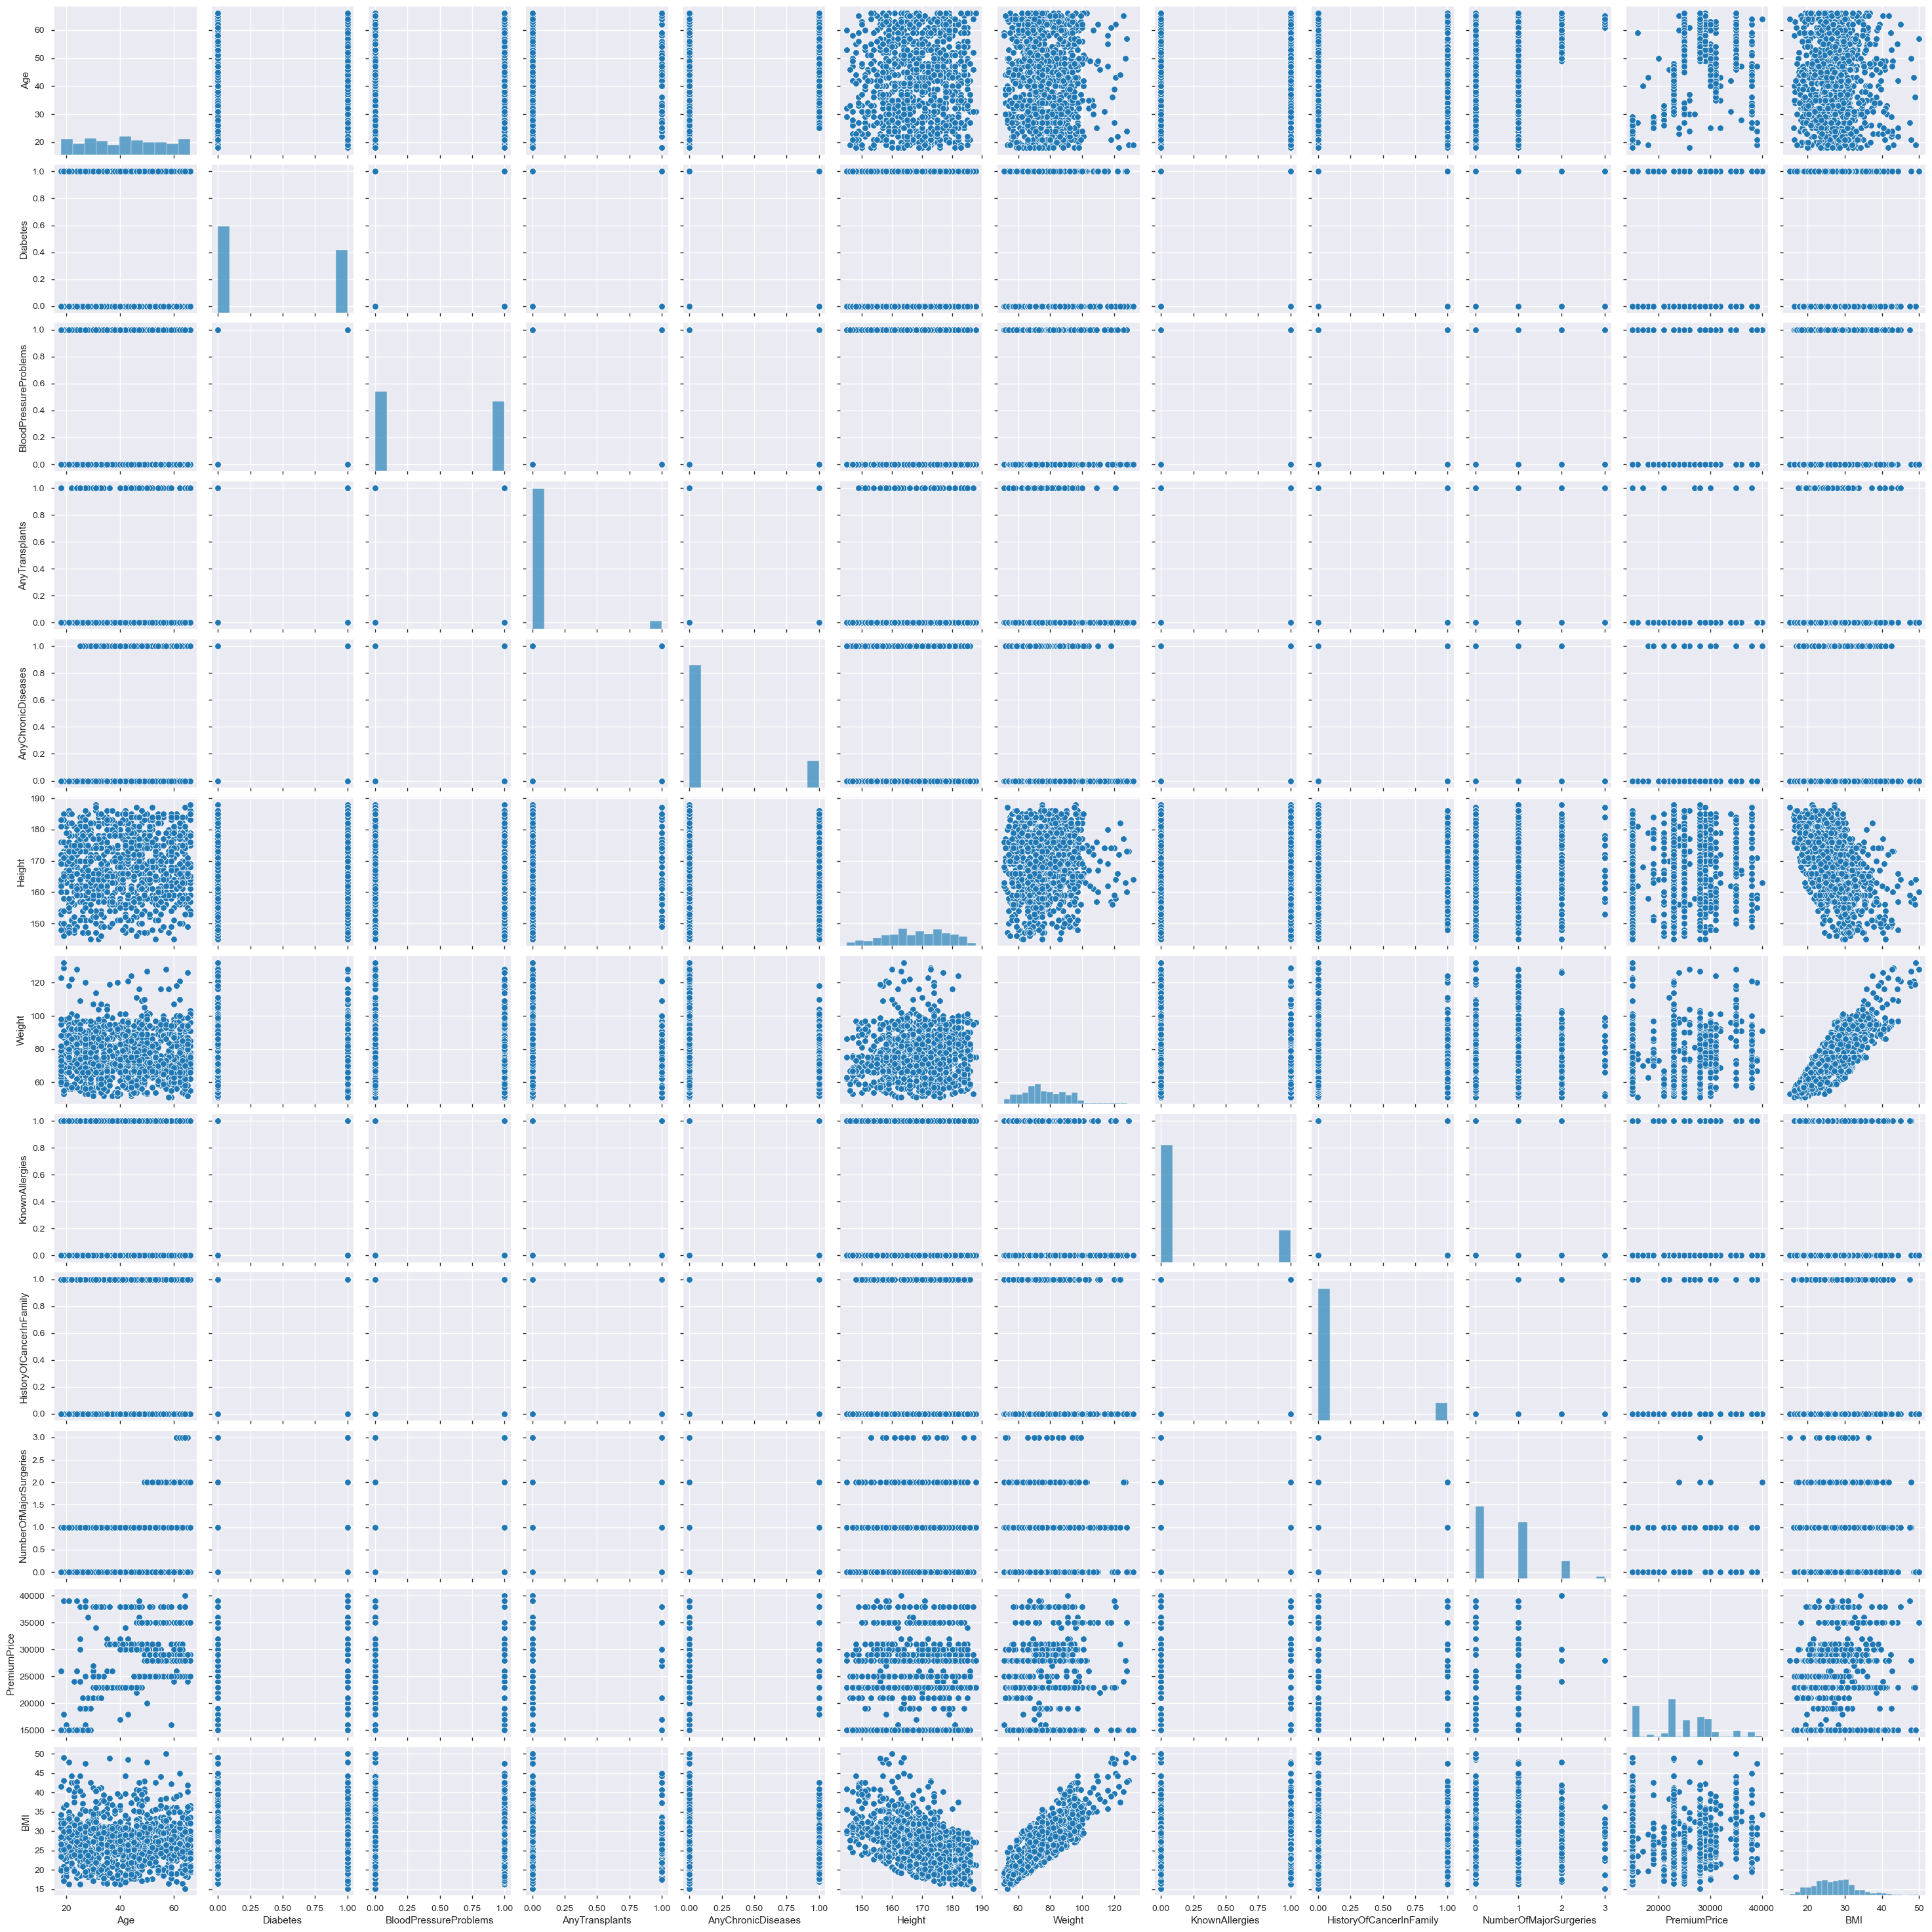

In [92]:
sns.pairplot(IP_data)
#plt.show()